# **Loading Dataset**

In [ ]:
import pandas as pd

# Try reading with a different encoding
data = pd.read_csv('data.csv', encoding='latin1')
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
print(data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162913 entries, 0 to 162912
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    162913 non-null  object 
 1   StockCode    162913 non-null  object 
 2   Description  162283 non-null  object 
 3   Quantity     162912 non-null  float64
 4   InvoiceDate  162912 non-null  object 
 5   UnitPrice    162912 non-null  float64
 6   CustomerID   113420 non-null  float64
 7   Country      162912 non-null  object 
dtypes: float64(3), object(5)
memory usage: 9.9+ MB


# **Data Cleaning**

In [ ]:
print(data.isnull().sum())

InvoiceNo          0
StockCode          0
Description      630
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     49493
Country            1
dtype: int64


In [ ]:
# Fill missing values
data['Description'] = data['Description'].fillna('Unknown')
data['CustomerID'] = data['CustomerID'].fillna(0)

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create a new feature: TotalSales
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Verify cleaned data
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162913 entries, 0 to 162912
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162913 non-null  object        
 1   StockCode    162913 non-null  object        
 2   Description  162913 non-null  object        
 3   Quantity     162912 non-null  float64       
 4   InvoiceDate  162912 non-null  datetime64[ns]
 5   UnitPrice    162912 non-null  float64       
 6   CustomerID   162913 non-null  float64       
 7   Country      162912 non-null  object        
 8   TotalSales   162912 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 11.2+ MB
None
InvoiceNo      0
StockCode      0
Description    0
Quantity       1
InvoiceDate    1
UnitPrice      1
CustomerID     0
Country        1
TotalSales     1
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162913 entries, 0 to 162912
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162913 non-null  object        
 1   StockCode    162913 non-null  object        
 2   Description  162913 non-null  object        
 3   Quantity     162912 non-null  float64       
 4   InvoiceDate  162912 non-null  datetime64[ns]
 5   UnitPrice    162912 non-null  float64       
 6   CustomerID   162913 non-null  float64       
 7   Country      162912 non-null  object        
 8   TotalSales   162912 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 11.2+ MB
None


# **Visualization**

Top 10 Countries by Total Sales

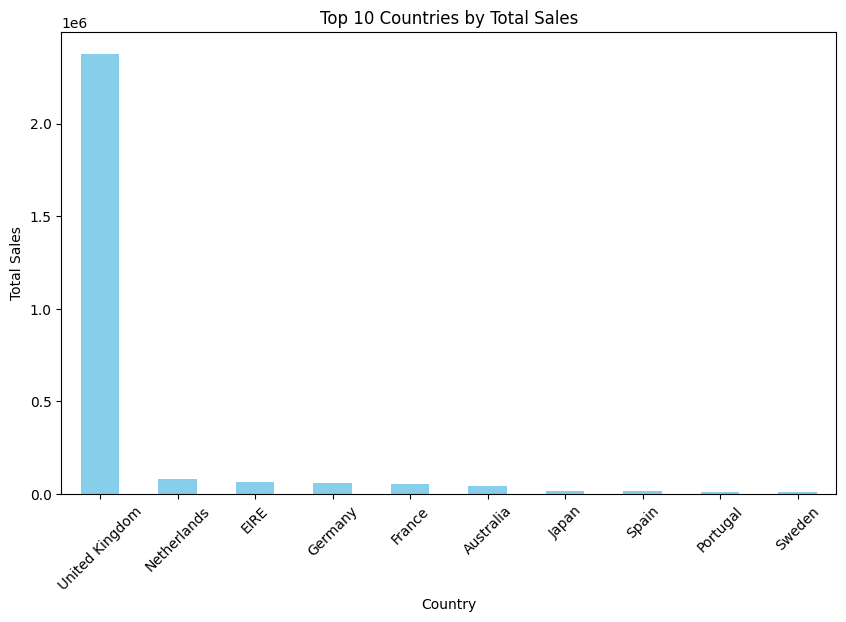

In [ ]:
import matplotlib.pyplot as plt

# Group by country and calculate total sales
country_sales = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Most Sold Products (Top 10 by Quantity)

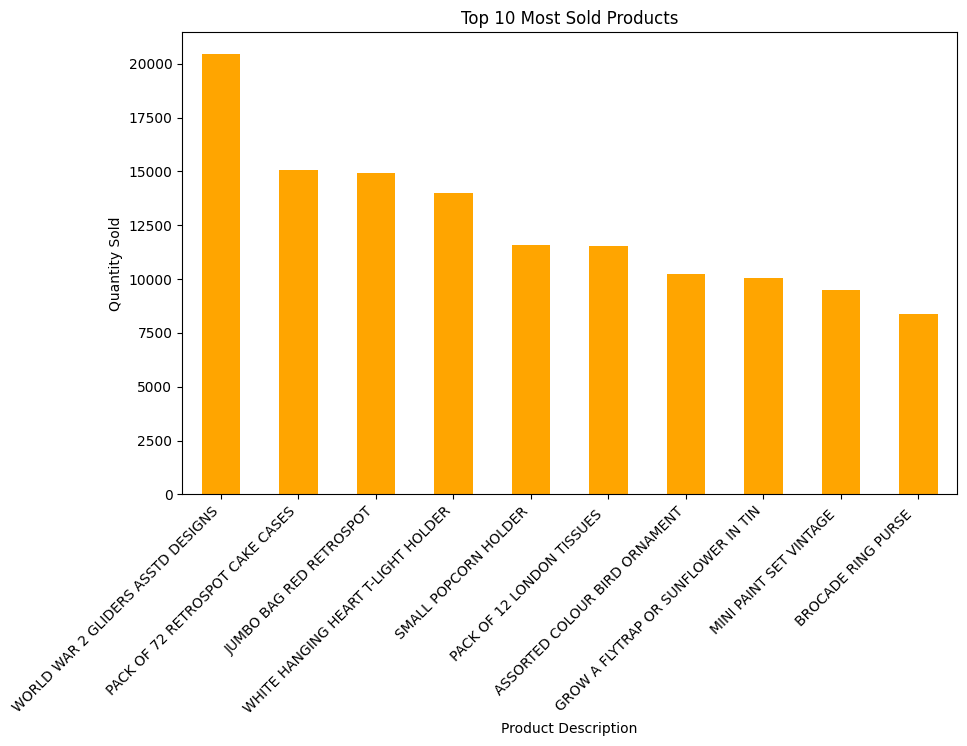

In [ ]:
# Group by description and calculate total quantity
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


Monthly Sales Trend

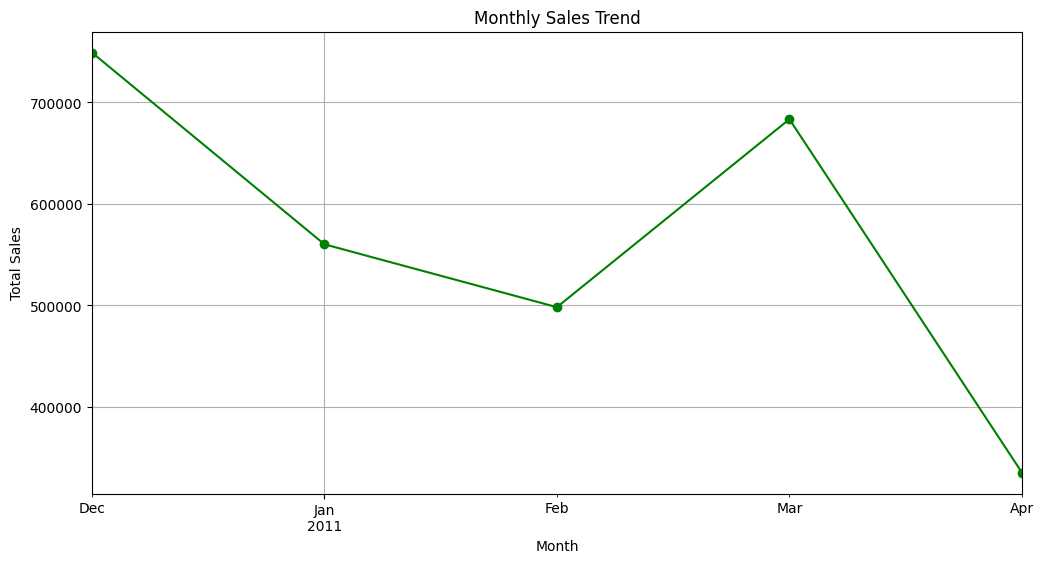

In [ ]:
# Extract month and year from InvoiceDate
data['Month'] = data['InvoiceDate'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = data.groupby('Month')['TotalSales'].sum()

# Plot the results
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


Top 10 Customers by Total Spend

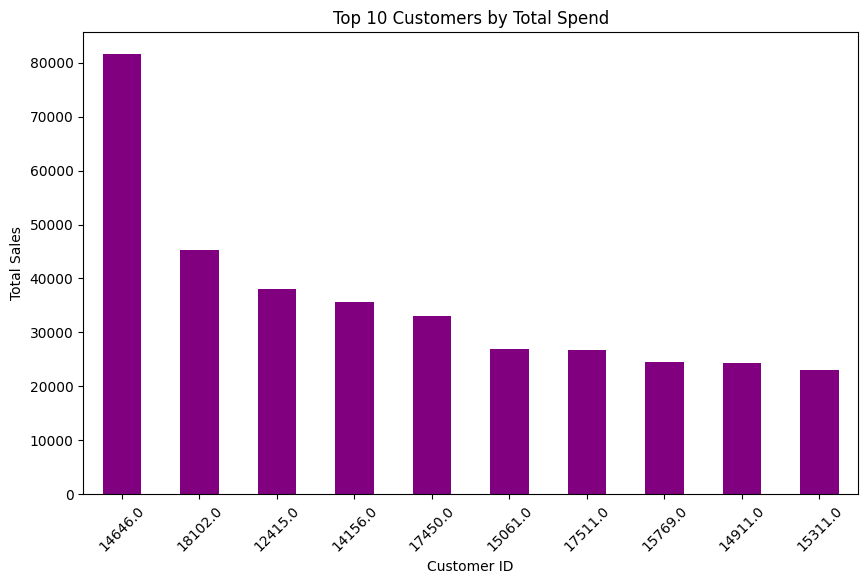

In [ ]:
# Group by CustomerID and calculate total sales
grouped_data = data.groupby('CustomerID')['TotalSales'].sum()

# Remove CustomerID 0 from the grouped data
grouped_data = grouped_data[grouped_data.index != 0]

# Get the top 10 customers by total spend
top_customers = grouped_data.sort_values(ascending=False).head(10)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Sales Distribution by Country

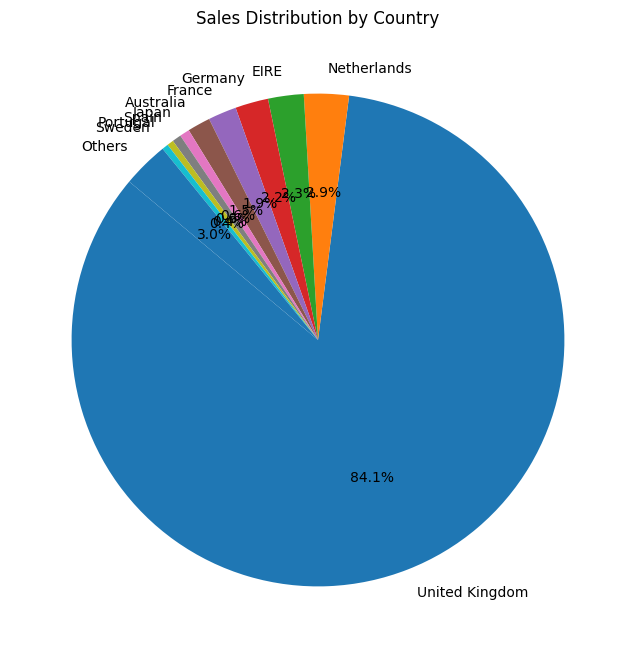

In [ ]:
# Calculate total sales by country
country_sales = data.groupby('Country')['TotalSales'].sum()

# Select the top 10 countries and group the rest as "Others"
top_countries = country_sales.nlargest(10)
other_countries = country_sales.sum() - top_countries.sum()
top_countries['Others'] = other_countries

# Plot the results
plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Sales Distribution by Country')
plt.ylabel('')
plt.show()


Sales Performance by Hour

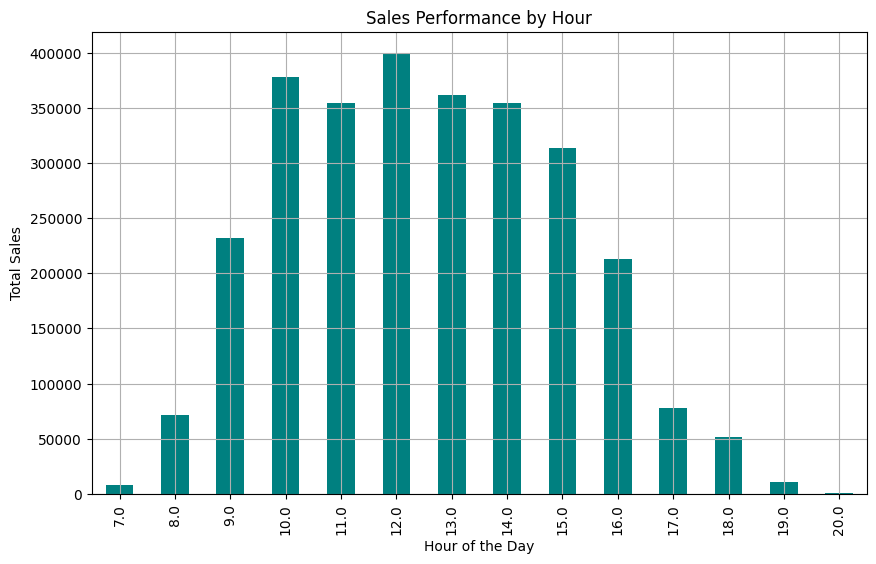

In [ ]:
# Extract hour from InvoiceDate
data['Hour'] = data['InvoiceDate'].dt.hour

# Group by hour and calculate total sales
hourly_sales = data.groupby('Hour')['TotalSales'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='teal')
plt.title('Sales Performance by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


# **Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to normalize
columns_to_normalize = ['Quantity', 'UnitPrice', 'TotalSales']

# Apply Z-Score Normalization
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Check normalized data
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.011479   
1    536365     71053                  WHITE METAL LANTERN -0.011479   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.003955   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.011479   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.011479   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00  -0.025421     17850.0  United Kingdom   -0.006885   
1 2010-12-01 08:26:00  -0.016914     17850.0  United Kingdom    0.010098   
2 2010-12-01 08:26:00  -0.023395     17850.0  United Kingdom    0.015692   
3 2010-12-01 08:26:00  -0.016914     17850.0  United Kingdom    0.010098   
4 2010-12-01 08:26:00  -0.016914     17850.0  United Kingdom    0.010098   

     Month  Hour  
0  2010-12   8.0  
1  2010-12   8.0  
2  2010-12   8.0  
3  2010-12   8.0  
4  2010-12   8.

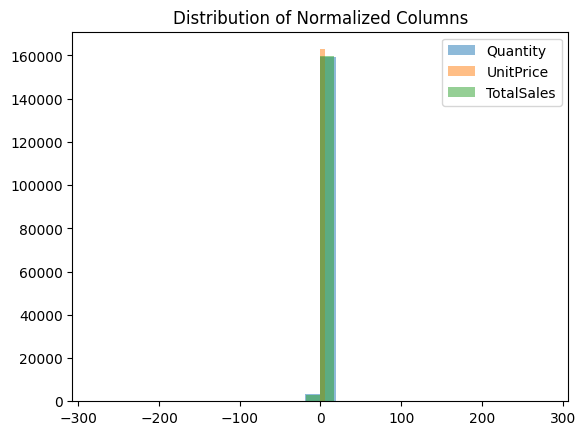

In [ ]:
import matplotlib.pyplot as plt

# Plot normalized Quantity
plt.hist(data['Quantity'], bins=30, alpha=0.5, label='Quantity')
plt.hist(data['UnitPrice'], bins=30, alpha=0.5, label='UnitPrice')
plt.hist(data['TotalSales'], bins=30, alpha=0.5, label='TotalSales')
plt.legend()
plt.title('Distribution of Normalized Columns')
plt.show()


# **Feature Engineering**

Total Revenue

In [ ]:
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']


Price per Item

In [ ]:
data['PricePerItem'] = data['UnitPrice'] / data['Quantity']


Customer Lifetime Revenue

In [ ]:
customer_revenue = data.groupby('CustomerID')['TotalSales'].sum().reset_index()
customer_revenue.rename(columns={'TotalSales': 'CustomerLifetimeRevenue'}, inplace=True)
data = data.merge(customer_revenue, on='CustomerID', how='left')


Basket Size (Transaction Size)

In [ ]:
transaction_size = data.groupby('InvoiceNo')['Quantity'].sum().reset_index()
transaction_size.rename(columns={'Quantity': 'BasketSize'}, inplace=True)
data = data.merge(transaction_size, on='InvoiceNo', how='left')


# **Validation and Schema Checks**

In [ ]:
# Define expected schema
expected_schema = {
    'InvoiceNo': 'object',
    'StockCode': 'object',
    'Description': 'object',
    'Quantity': 'int64',
    'InvoiceDate': 'datetime64[ns]',
    'UnitPrice': 'float64',
    'CustomerID': 'float64',
    'Country': 'object',
    'TotalSales': 'float64',
    'TotalRevenue': 'float64',
    'PricePerItem': 'float64',
    'CustomerLifetimeRevenue': 'float64',
    'BasketSize': 'float64'
}

# Validate column presence
for column in expected_schema.keys():
    if column not in data.columns:
        print(f"Missing column: {column}")
    else:
        print(f"Column {column} exists.")

# Validate data types
for column, dtype in expected_schema.items():
    if column in data.columns:
        if str(data[column].dtypes) != dtype:
            print(f"Column {column} has incorrect type. Expected {dtype}, found {data[column].dtypes}.")
        else:
            print(f"Column {column} type is correct.")

# Check value ranges
if (data['Quantity'] < 0).any():
    print("Warning: 'Quantity' contains negative values.")
if (data['UnitPrice'] < 0).any():
    print("Warning: 'UnitPrice' contains negative values.")
if (data['PricePerItem'] < 0).any():
    print("Warning: 'PricePerItem' contains negative values.")

# Check for missing values in critical columns
critical_columns = ['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'TotalRevenue']
missing_counts = data[critical_columns].isnull().sum()
if missing_counts.any():
    print("Missing values detected in critical columns:")
    print(missing_counts)
else:
    print("No missing values in critical columns.")


Column InvoiceNo exists.
Column StockCode exists.
Column Description exists.
Column Quantity exists.
Column InvoiceDate exists.
Column UnitPrice exists.
Column CustomerID exists.
Column Country exists.
Column TotalSales exists.
Column TotalRevenue exists.
Column PricePerItem exists.
Column CustomerLifetimeRevenue exists.
Column BasketSize exists.
Column InvoiceNo type is correct.
Column StockCode type is correct.
Column Description type is correct.
Column Quantity has incorrect type. Expected int64, found float64.
Column InvoiceDate type is correct.
Column UnitPrice type is correct.
Column CustomerID type is correct.
Column Country type is correct.
Column TotalSales type is correct.
Column TotalRevenue type is correct.
Column PricePerItem type is correct.
Column CustomerLifetimeRevenue type is correct.
Column BasketSize type is correct.
Missing values detected in critical columns:
InvoiceNo       0
Quantity        1
UnitPrice       1
CustomerID      0
TotalRevenue    1
dtype: int64


In [ ]:
data['Quantity'] = data['Quantity'].astype(int)


In [ ]:
# If negative quantities indicate returns, keep them as is.
print(f"Negative quantities retained: {data[data['Quantity'] < 0].shape[0]}")
data = data[data['Quantity'] >= 0]
print(f"Negative quantities retained: {data[data['Quantity'] < 0].shape[0]}")


Negative quantities retained: 0
Negative quantities retained: 0


In [ ]:
data['UnitPrice'] = data['UnitPrice'].clip(lower=0)
data['PricePerItem'] = data['PricePerItem'].clip(lower=0)


In [ ]:
# Recheck data types
print(f"Quantity data type: {data['Quantity'].dtypes}")

# Check for remaining negative values
print(f"Negative Quantity values: {(data['Quantity'] < 0).sum()}")
print(f"Negative UnitPrice values: {(data['UnitPrice'] < 0).sum()}")
print(f"Negative PricePerItem values: {(data['PricePerItem'] < 0).sum()}")


Quantity data type: int64
Negative Quantity values: 0
Negative UnitPrice values: 0
Negative PricePerItem values: 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42022 entries, 9 to 162911
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   InvoiceNo                42022 non-null  object        
 1   StockCode                42022 non-null  object        
 2   Description              42022 non-null  object        
 3   Quantity                 42022 non-null  int64         
 4   InvoiceDate              42022 non-null  datetime64[ns]
 5   UnitPrice                42022 non-null  float64       
 6   CustomerID               42022 non-null  float64       
 7   Country                  42022 non-null  object        
 8   TotalSales               42022 non-null  float64       
 9   Month                    42022 non-null  period[M]     
 10  Hour                     42022 non-null  float64       
 11  TotalRevenue             42022 non-null  float64       
 12  PricePerItem             42022 non-n

# **Principal Component Analysis**

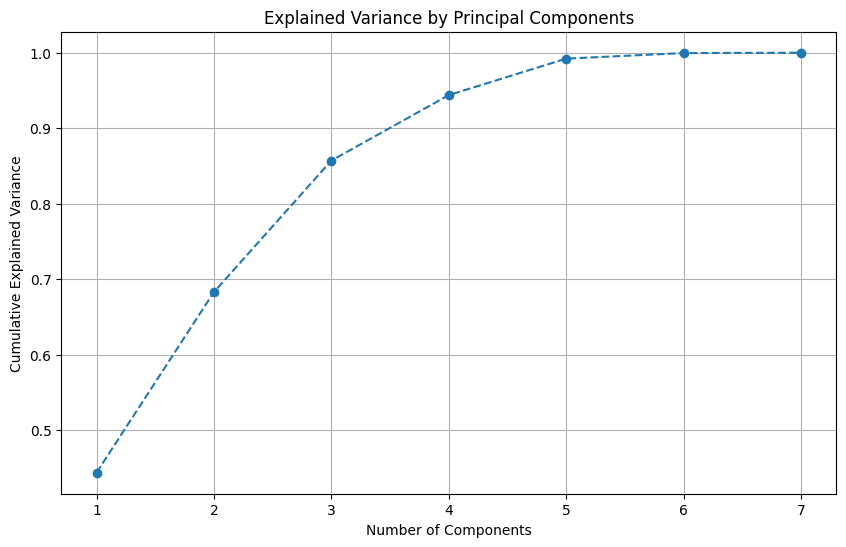

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical columns for PCA
numerical_columns = ['Quantity', 'UnitPrice', 'TotalSales', 'TotalRevenue',
                     'PricePerItem', 'CustomerLifetimeRevenue', 'BasketSize']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Plot explained variance to decide the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Retain components explaining ~95% variance
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)

# Add PCA features to the dataset (optional)
pca_columns = [f'PC{i+1}' for i in range(reduced_data.shape[1])]
for i, col in enumerate(pca_columns):
    data[col] = reduced_data[:, i]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Select numerical columns
numerical_columns = ['Quantity', 'UnitPrice', 'TotalRevenue', 'PricePerItem', 'CustomerLifetimeRevenue', 'BasketSize']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Apply PCA for the top 5 components
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_features = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(5)])

# Target variable
target = data['TotalSales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(pca_features, target, test_size=0.2, random_state=42)


# **Model Training & Testing**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.2f}, R2: {r2:.2f}")


Linear Regression - MSE: 0.11, R2: 0.18


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MSE: {mse:.2f}, R2: {r2:.2f}")


Random Forest - MSE: 0.06, R2: 0.53


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - MSE: {mse:.2f}, R2: {r2:.2f}")


Gradient Boosting - MSE: 0.07, R2: 0.42


Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Support Vector Regressor - MSE: {mse:.2f}, R2: {r2:.2f}")


Support Vector Regressor - MSE: 0.08, R2: 0.34


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - MSE: {mse:.2f}, R2: {r2:.2f}")


XGBoost - MSE: 0.08, R2: 0.37
